In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv("./satisfaction.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


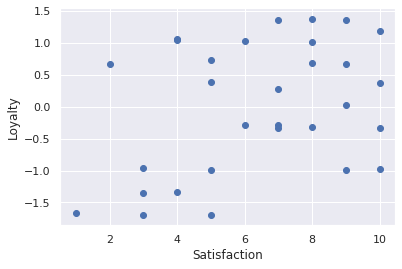

In [0]:
plt.scatter(data["Satisfaction"], data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [0]:
from sklearn.cluster import KMeans
x =data.copy()
kmeans = KMeans(2)

kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)
clusters.head()

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1


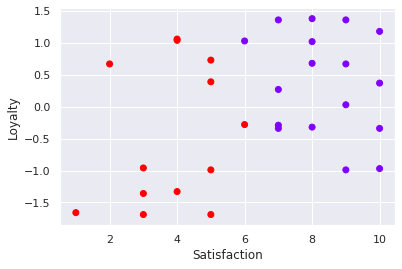

In [0]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'],  cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [0]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

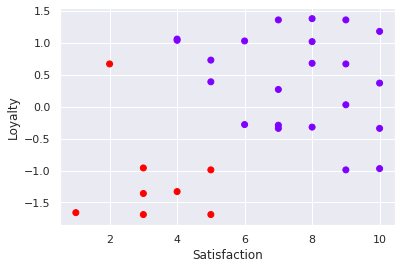

In [0]:
kmeans = KMeans(2)

kmeans.fit(x_scaled)

clusters = x.copy()
prediction = kmeans.fit_predict(x_scaled)
clusters.head()
clusters['cluster_pred'] = kmeans.fit_predict(x)


plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=prediction,  cmap='rainbow')
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()


In [0]:
#wcss within-cluster sum of squares / varianzia
wcss = []

for i in range(1, 30):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.586212092192188,
 5.464232350204885,
 4.395247193896115,
 3.825482330657991,
 3.352018568988348,
 2.963730070255306,
 2.267541771007072,
 2.060956111273019,
 1.8328895007244854,
 1.5687136341572807,
 1.4019339666067252,
 1.2118028560809673,
 0.9716636175522552,
 0.7706518173776857,
 0.695013697957994,
 0.5362608768873279,
 0.467984893112209,
 0.3227119817275011,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

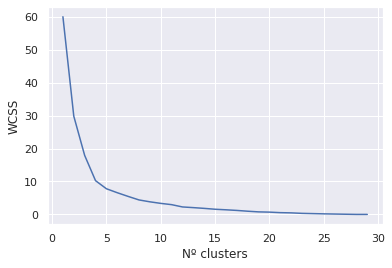

In [0]:
plt.plot(range(1,30), wcss)
plt.xlabel('Nº clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
kmeans_new = KMeans(4)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,2
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,1
9,8,0.68,1


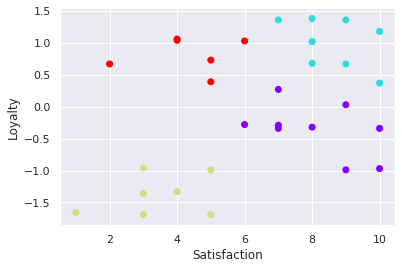

In [0]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()